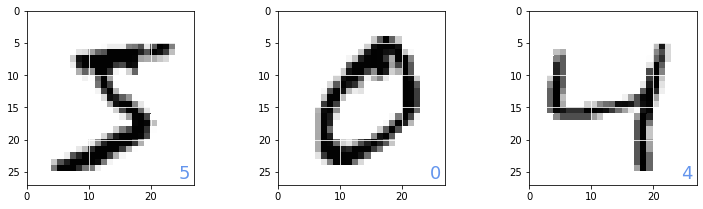

In [17]:
#MNIST를 피드포워드네트워크에 인식시키기
#피드포워드네트워크란? 한 방향으로만 흐르는 신경망

#케라스 MNIST DB 불러오기

from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#60000개의 훈련용 데이터에(x_train, y_train)에 저장되고
#10000개의 테스트용 데이터는 test에 저장된다.


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1,figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1,3,id+1) #그래프 3개 만들기
    img=x_train[id,:,:] #x_train에 있는 id대로 하나씩 
    plt.pcolor(255-img) #히트맵을 그린다.
    plt.text(24.5,26,"%d" % y_train[id], color='cornflowerblue',fontsize=18) 
    #폰트사이즈는 18, 색은 cornflowerblue(이건 아래에 구분되는것.)
    plt.xlim(0,27) #x축 범위
    plt.ylim(27,0) #y축 범위
    plt.grid('on',color='white') 
plt.show()

In [18]:
#2층 피드 포워드 네트워크 모델
from keras.utils import np_utils

x_train=x_train.reshape(60000,784)
x_train=x_train.astype('float32')
x_train=x_train/255
num_classes=10
y_train=np_utils.to_categorical(y_train,num_classes)
x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test=x_test/255
y_test=np_utils.to_categorical(y_test,num_classes)

np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam

model=Sequential()
model.add(Dense(16,input_dim=784,activation='sigmoid')) #중간 히든레이어는 16개
model.add(Dense(10,activation='softmax')) #네트워크 출력층은 10개의 뉴런으로
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

import time
startTime=time.time()
history=model.fit(x_train,y_train,epochs=10,batch_size=1000,verbose=1,validation_data=(x_test,y_test)) #10번의 epoch 
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy',score[1])
print('Computation time:[0:.3f]sec'.format(time.time()-startTime))
#아래의 결과는 10번의 epoch으로 1000개의 미니배치를 60번 iteration

Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 1.9665 - accuracy: 0.4990 - val_loss: 1.6587 - val_accuracy: 0.6937
Epoch 2/10
60/60 [==============================] - 0s 7ms/step - loss: 1.4905 - accuracy: 0.7444 - val_loss: 1.3148 - val_accuracy: 0.8064
Epoch 3/10
60/60 [==============================] - 1s 8ms/step - loss: 1.2095 - accuracy: 0.8103 - val_loss: 1.0818 - val_accuracy: 0.8369
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 1.0129 - accuracy: 0.8352 - val_loss: 0.9153 - val_accuracy: 0.8537
Epoch 5/10
60/60 [==============================] - 1s 11ms/step - loss: 0.8696 - accuracy: 0.8494 - val_loss: 0.7923 - val_accuracy: 0.8640
Epoch 6/10
60/60 [==============================] - 1s 11ms/step - loss: 0.7621 - accuracy: 0.8606 - val_loss: 0.6994 - val_accuracy: 0.8699
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 0.6788 - accuracy: 0.8695 - val_loss: 0.6267 - val_accuracy: 0.8779
Epoch 8/10
60/6

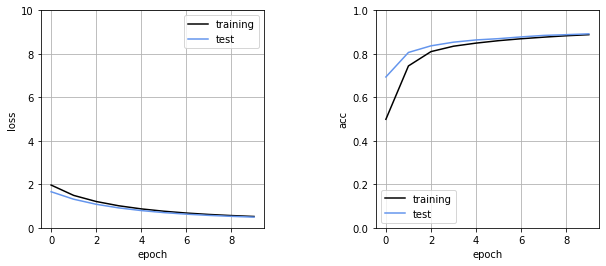

In [19]:
#위의 결과가 오버피팅이 일어나지 않았는지 확인해보자!
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1,figsize=(10,4))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='training',color='black')
plt.plot(history.history['val_loss'],label='test',color='cornflowerblue')
plt.ylim(0,10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='training',color='black')
plt.plot(history.history['val_accuracy'],label='test',color='cornflowerblue')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

#출력결과를 보면 오버피팅은 일어나지 않았다. 


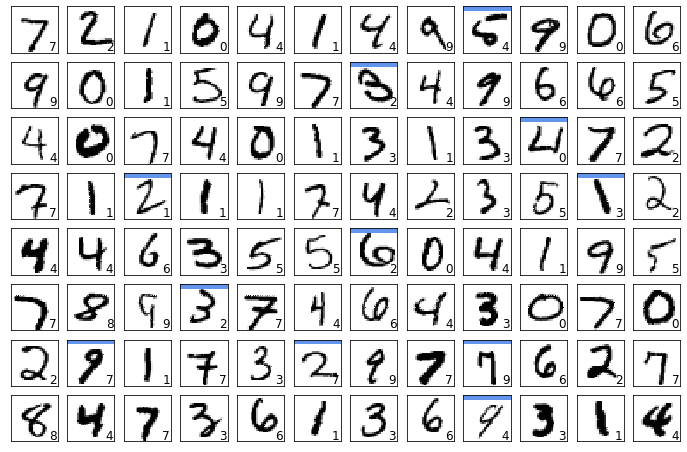

In [20]:
#그렇다면 89.51%의 정확도는 좋은 편일까요??
def show_prediction():
    n_show=96
    y=model.predict(x_test)
    plt.figure(2,figsize=(12,8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8,12,i+1)
        x=x_test[i,:]
        x=x.reshape(28,28)
        plt.pcolor(1-x)
        wk=y[i,:]
        prediction=np.argmax(wk)
        plt.text(22,25.5,"%d" % prediction, fontsize=12)
        if prediction!=np.argmax(y_test[i,:]):
            plt.plot([0,27],[1,1],color='cornflowerblue',linewidth=5)
        plt.xlim(0,27)
        plt.ylim(27,0)
        plt.xticks([],"")
        plt.yticks([],"")
show_prediction()
plt.show()
#아래의 결과는 x_test 전체에 대한 모델의 출력 y를 얻을 수 있다. 그중에서 처음 96개의 분량을 표시했다.
#그 중 10개나 틀린 결과를 나타내었다. 이는 만족스럽지 않은 결과다. 
#누가봐도 2인데 6으로 대답하는 경우도 있다.

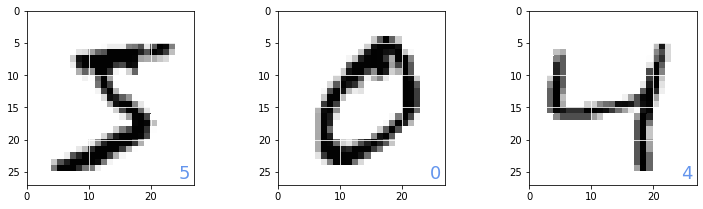

Epoch 1/10
60/60 [==============================] - 2s 34ms/step - loss: 1.4190 - accuracy: 0.6028 - val_loss: 0.7570 - val_accuracy: 0.8434
Epoch 2/10
60/60 [==============================] - 0s 6ms/step - loss: 0.5943 - accuracy: 0.8605 - val_loss: 0.4570 - val_accuracy: 0.8839
Epoch 3/10
60/60 [==============================] - 0s 8ms/step - loss: 0.4282 - accuracy: 0.8890 - val_loss: 0.3748 - val_accuracy: 0.8986
Epoch 4/10
60/60 [==============================] - 1s 12ms/step - loss: 0.3673 - accuracy: 0.9007 - val_loss: 0.3351 - val_accuracy: 0.9060
Epoch 5/10
60/60 [==============================] - 1s 12ms/step - loss: 0.3340 - accuracy: 0.9081 - val_loss: 0.3130 - val_accuracy: 0.9100
Epoch 6/10
60/60 [==============================] - 0s 6ms/step - loss: 0.3130 - accuracy: 0.9132 - val_loss: 0.2983 - val_accuracy: 0.9156
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2979 - accuracy: 0.9171 - val_loss: 0.2873 - val_accuracy: 0.9180
Epoch 8/10
60/60 

In [26]:
#Relu 활성화 함수를 사용해서 결과
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#60000개의 훈련용 데이터에(x_train, y_train)에 저장되고
#10000개의 테스트용 데이터는 test에 저장된다.


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1,figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1,3,id+1) #그래프 3개 만들기
    img=x_train[id,:,:] #x_train에 있는 id대로 하나씩 
    plt.pcolor(255-img) #히트맵을 그린다.
    plt.text(24.5,26,"%d" % y_train[id], color='cornflowerblue',fontsize=18) 
    #폰트사이즈는 18, 색은 cornflowerblue(이건 아래에 구분되는것.)
    plt.xlim(0,27) #x축 범위
    plt.ylim(27,0) #y축 범위
    plt.grid('on',color='white') 
plt.show()
from keras.utils import np_utils

x_train=x_train.reshape(60000,784)
x_train=x_train.astype('float32')
x_train=x_train/255
num_classes=10
y_train=np_utils.to_categorical(y_train,num_classes)
x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test=x_test/255
y_test=np_utils.to_categorical(y_test,num_classes)

np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam

model=Sequential()
model.add(Dense(16,input_dim=784,activation='relu')) #중간 히든레이어는 16개
model.add(Dense(10,activation='softmax')) #네트워크 출력층은 10개의 뉴런으로
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

import time
startTime=time.time()
history=model.fit(x_train,y_train,epochs=10,batch_size=1000,verbose=1,validation_data=(x_test,y_test)) #10번의 epoch 
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy',score[1])
print('Computation time:[0:.3f]sec'.format(time.time()-startTime))
#정확도가 92%까지 올랐다.

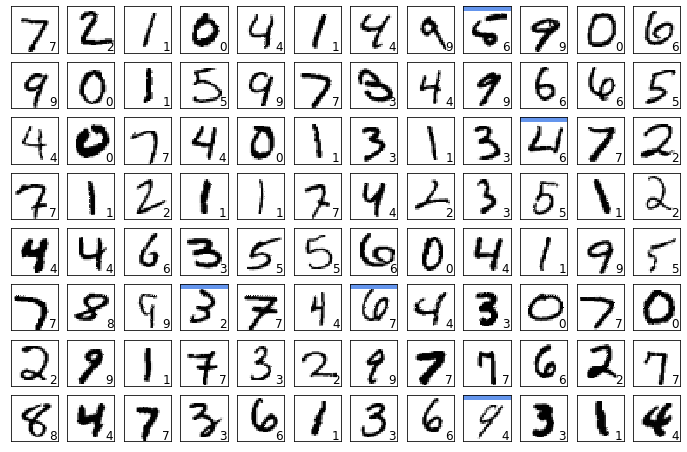

In [27]:
#위를 바탕으로 한번확인해봅시다
show_prediction()
plt.show()
#5개 틀린 것으로 줄었지만 여전히 누가봐도 3인데 2로 인식하는 경우를 확인할 수 있다. 


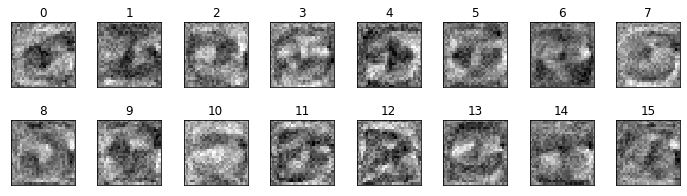

In [28]:
#1층째의 가중치 가시화
w=model.layers[0].get_weights()[0]
plt.figure(1,figsize=(12,3))
plt.gray()
plt.subplots_adjust(wspace=0.35,hspace=0.5)
for i in range(16):
    plt.subplot(2,8,i+1)
    w1=w[:,i]
    w1=w1.reshape(28,28)
    plt.pcolor(-w1)
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.xticks([],"")
    plt.yticks([],"")
    plt.title("%d" % i)
plt.show()
#검은 부분에 문자 일부분이 있으면 그 뉴런은 활성화하고 흰부분에 문자일부분이 있으면 억제된다.
#12번 뉴런의 가중치는 2의 형태가 검게 나타나고 있다.
#아마 2를 인식하는데 도움이 될 것이다. 